In [11]:
import networkx as nx
import random
import math

In [12]:
# check if required nodes are present in the tree
def check_nodes(G, R):
    for i in range(len(R)):
        vertex = R[i]
        if G.has_node(str(vertex)):
            pass
        else:
            print("Invalid output: All required nodes not present")
            return False
    return True

# create a graph from the output file
def create_MST(edges, num_edges):
    if len(edges) < num_edges:
        print('Invalid output: Not enough edges provided')
        return
    else:
        G = nx.Graph()
        for i in range(num_edges):

            if edges[i] != '':
                edge = edges[i]
                edge = edge.split(' ')
                G.add_edge(edge[0], edge[1])
        return G

class MST:
    '''
    Class that constructs input graph and finds the Minimum Spanning Tree for a set of vertices
    '''
    def __init__(self, data):
        '''
        Take data and construct graph
        '''
        self.data = data
        self.generate_graph()
        nodes = self.graph.nodes
        
        # Initialize final edge list
        self.final_edges = []
        
    #-----------Methods-------------------
    def find_minimum_subset_tree(self):
        '''
        Run full algorithm to find minimum tree spanning subset R of V
        '''
        self.get_all_shortest_paths(self.graph)
        self.create_shortest_paths_graph()
        self.mst(self.graph)
        min_tree.get_mst_of_sp_graph()
        self.final_cost = self.get_graph_cost(self.final_edges)
        
        # generate output
        out_string = str(self.final_cost) + '\n'
        out_string += str(len(self.final_edges)) + '\n'
        
        for edge in self.final_edges:
            out_string += '{} {}\n'.format(edge[0], edge[1])
        
        return out_string
    
    def get_all_shortest_paths(self, graph):
        '''
        Calculate shortest paths between node i and node j, for all (i, j) in required vertices
        '''
        self.shortest_paths_list = []
        
        for i in range(int(self.dims[2])):
            for j in range(i+1, int(self.dims[2])):
                
                # Run Dijkstra's to compute shortest path between i and j
                self.shortest_paths_list.append(nx.shortest_path(graph, source=self.r_vertices[i], target=self.r_vertices[j], method='dijkstra'))
        
    def create_shortest_paths_graph(self):
        '''Creates graph of shortest paths between all required vertices'''
        
        self.sp_graph = nx.Graph()
        self.edge_dict = {} # Conversion dictionary for edges
        
        for sp in self.shortest_paths_list:
            # Get edges
            edges = [(sp[i], sp[i+1]) for i in range(len(sp) - 1)]
            # Get weights of edges
            tot_weight = 0
            for edge in edges:
                weight = self.graph.get_edge_data(edge[0], edge[1])['weight']
                tot_weight += weight
            # Create edge from the beginning of path to end of path, assigning total weight to edge
            self.sp_graph.add_edge(sp[0], sp[-1], weight=tot_weight)
            self.edge_dict['(\'{}\', \'{}\')'.format(sp[0], sp[-1])] = edges     
            
    def get_mst_of_sp_graph(self):
        '''
        Compute the minimum spanning tree of shortest paths graph, then create the final edge list
        '''
        self.sp_graph = self.mst(self.sp_graph)
        
        for edge in self.sp_graph.edges:
            self.final_edges.extend(self.edge_dict[str(edge)])
        
    def mst(self, graph):
        '''
        Run Prim's algorithm on given graph
        '''
        return nx.minimum_spanning_tree(graph, algorithm='prim')
            
    def generate_graph(self):
        self.dims = self.data.pop(0).split(' ')
        self.r_vertices = self.data.pop(0).split(' ')
        self.graph = nx.Graph()
        self.graph.add_nodes_from([str(i) for i in range(1, int(self.dims[0]) + 1)]) # Graph is 1-indexed
        
        for i, edge in enumerate(self.data):
            edge = edge.strip().split(' ')
            self.graph.add_edge(edge[0], edge[1], weight=int(edge[2]))
    
    def get_graph_cost(self, graph):
        cost = 0
        if isinstance(graph, list):
            for edge in graph:
                cost += self.graph.get_edge_data(edge[0], edge[1])['weight']
        else:
            for edge in graph.edges:
                cost += graph.get_edge_data(edge[0], edge[1])['weight']
                
        return cost
    
    def check_tree(self, graph):
        '''
        Run search algorithm to check if input graph is a valid tree
        '''
        return nx.is_tree(graph)
    
#     def simulate_annealing(self):
#         '''
#         Run simulated annealing algorithm to find minimum spanning tree of required vertices
#         !! WILL NOT BE USING THIS FOR ALGOBOWL UNLESS WE NEED TO!!
#         '''
#         current_state = self.generate_random_tree()
#         k_steps = 10000
#         for k in range(k_steps+1):
#             T = (k_steps - k)
#             if T <=0:
#                 return current_state
#             next_state = self.get_neighbor()
#             delta = self.get_tree_cost(next_state) - self.get_tree_cost(current_state)
#             if delta < 0:
#                 current_state = next_state
#             else:
#                 prob = random.uniform(0,1)
#                 if prob <= math.exp(-delta/T):
#                     next_state = current_state
#         return current_state
    
#     def generate_random_tree(self):
#         pass
    
#     def get_neighbor(self, tree):
#         pass

In [13]:
data = ''
with open('../inputs/hart_test_bias_num5075.txt', 'r') as x:
    for line in x:
        data = data + line
data = data.strip().split('\n')
min_tree = MST(data)
# print(min_tree.dims, min_tree.r_vertices, min_tree.graph.edges)

In [14]:
output = min_tree.find_minimum_subset_tree()
ref_graph = create_MST(output.split('\n')[2:], len(min_tree.r_vertices))
print(check_nodes(ref_graph, min_tree.r_vertices))
# print(output)

True


In [15]:
min_tree.get_all_shortest_paths(min_tree.graph)
min_tree.create_shortest_paths_graph()
min_tree.mst(min_tree.graph)
min_tree.get_mst_of_sp_graph()
min_tree.get_graph_cost(min_tree.final_edges)
print(min_tree.get_graph_cost(min_tree.final_edges), min_tree.get_graph_cost(min_tree.graph))
final_tree = nx.Graph()
final_tree.add_edges_from(min_tree.final_edges)
min_tree.check_tree(final_tree)

4656 1864642


True

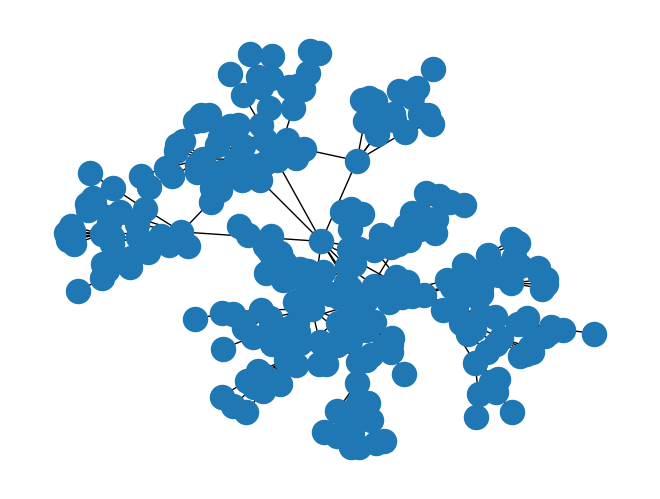

In [16]:
nx.draw(final_tree)

In [17]:
print(final_tree.edges)

[('13', '297'), ('297', '36'), ('358', '27'), ('27', '50'), ('115', '298'), ('298', '82'), ('339', '427'), ('427', '36'), ('427', '6'), ('427', '61'), ('327', '35'), ('35', '36'), ('35', '394'), ('346', '188'), ('346', '241'), ('346', '99'), ('188', '344'), ('188', '28'), ('188', '142'), ('188', '242'), ('188', '24'), ('133', '258'), ('133', '441'), ('133', '417'), ('258', '344'), ('258', '278'), ('258', '423'), ('258', '179'), ('258', '166'), ('258', '107'), ('258', '41'), ('106', '185'), ('185', '266'), ('185', '87'), ('185', '444'), ('185', '63'), ('269', '202'), ('202', '409'), ('202', '256'), ('202', '434'), ('202', '442'), ('15', '292'), ('292', '74'), ('292', '148'), ('292', '413'), ('292', '326'), ('416', '422'), ('416', '377'), ('422', '112'), ('422', '344'), ('422', '439'), ('422', '48'), ('422', '134'), ('422', '247'), ('422', '65'), ('422', '418'), ('37', '411'), ('411', '157'), ('411', '409'), ('411', '415'), ('411', '397'), ('411', '380'), ('344', '276'), ('344', '318'), 